In [5]:
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
#import imageio
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np

In [24]:
cd ../NYC

/Users/manalshah/Desktop/ML Project/Dataset/NYC


In [25]:
review_lang = pd.read_csv("reviews_language.csv")

In [8]:
language_short_name = {'aa':'Afar','ab':'Abkhazian','af':'Afrikaans','ak':'Akan','sq':'Albanian','am':'Amharic','ar':'Arabic',
'an':'Aragonese','hy':'Armenian','as':'Assamese','av':'Avaric','ae':'Avestan','ay':'Aymara','az':'Azerbaijani','ba':'Bashkir',
'bm':'Bambara','eu':'Basque','be':'Belarusian','bn':'Bengali','bh':'Bihari languages','bi':'Bislama','bo':'Tibetan','bs':'Bosnian',
'br':'Breton','bg':'Bulgarian','my':'Burmese','ca':'Catalan; Valencian','cs':'Czech','ch':'Chamorro','ce':'Chechen','zh':'Chinese',
'cu':'Church Slavic; Old Slavonic; Church Slavonic; Old Bulgarian; Old Church Slavonic','cv':'Chuvash','kw':'Cornish','co':'Corsican',
'cr':'Cree','cy':'Welsh','cs':'Czech','da':'Danish','de':'German','dv':'Divehi; Dhivehi; Maldivian','nl':'Dutch; Flemish','dz':'Dzongkha',
'el':'Greek-Modern (1453-)','en':'English','eo':'Esperanto','et':'Estonian','eu':'Basque','ee':'Ewe','fo':'Faroese','fa':'Persian',
'fj':'Fijian','fi':'Finnish','fr':'French','fy':'Western Frisian','ff':'Fulah','Ga':'Georgian','gd':'Gaelic; Scottish Gaelic','ga':'Irish',
'gl':'Galician','gv':'Manx','el':'Greek-Modern (1453-)','gn':'Guarani','gu':'Gujarati','ht':'Haitian; Haitian Creole','ha':'Hausa',
'he':'Hebrew','hz':'Herero','hi':'Hindi','ho':'Hiri Motu','hr':'Croatian','hu':'Hungarian','hy':'Armenian','ig':'Igbo','is':'Icelandic',
'io':'Ido','ii':'Sichuan Yi; Nuosu','iu':'Inuktitut','ie':'Interlingue; Occidental',
'ia':'Interlingua (International Auxiliary Language Association)','id':'Indonesian','ik':'Inupiaq','is':'Icelandic','it':'Italian',
'jv':'Javanese','ja':'Japanese','kl':'Kalaallisut; Greenlandic','kn':'Kannada','ks':'Kashmiri','ka':'Georgian','kr':'Kanuri','kk':'Kazakh',
'km':'Central Khmer','ki':'Kikuyu; Gikuyu','rw':'Kinyarwanda','ky':'Kirghiz; Kyrgyz','kv':'Komi','kg':'Kongo','ko':'Korean',
'kj':'Kuanyama; Kwanyama','ku':'Kurdish','lo':'Lao','la':'Latin','lv':'Latvian','li':'Limburgan; Limburger; Limburgish','ln':'Lingala',
'lt':'Lithuanian','lb':'Luxembourgish; Letzeburgesch','lu':'Luba-Katanga','lg':'Ganda','mk':'Macedonian','mh':'Marshallese',
'ml':'Malayalam','mi':'Maori','mr':'Marathi','ms':'Malay','Mi':'Micmac','mk':'Macedonian','mg':'Malagasy','mt':'Maltese',
'mn':'Mongolian','mi':'Maori','ms':'Malay','my':'Burmese','na':'Nauru','nv':'Navajo; Navaho','nr':'Ndebele-South; South Ndebele',
'nd':'Ndebele-North; North Ndebele','ng':'Ndonga','ne':'Nepali','nl':'Dutch; Flemish','nn':'Norwegian Nynorsk; Nynorsk:Norwegian',
'nb':'Bokmål-Norwegian; Norwegian Bokmål','no':'Norwegian','oc':'Occitan (post 1500)','oj':'Ojibwa','or':'Oriya','om':'Oromo',
'os':'Ossetian; Ossetic','pa':'Panjabi; Punjabi','fa':'Persian','pi':'Pali','pl':'Polish','pt':'Portuguese','ps':'Pushto; Pashto',
'qu':'Quechua','rm':'Romansh','ro':'Romanian; Moldavian; Moldovan','rn':'Rundi','ru':'Russian','sg':'Sango','sa':'Sanskrit',
'si':'Sinhala; Sinhalese','sk':'Slovak','sk':'Slovak','sl':'Slovenian','se':'Northern Sami','sm':'Samoan','sn':'Shona','sd':'Sindhi',
'so':'Somali','st':'Sotho-Southern','es':'Spanish; Castilian','sq':'Albanian','sc':'Sardinian','sr':'Serbian','ss':'Swati',
'su':'Sundanese','sw':'Swahili','sv':'Swedish','ty':'Tahitian','ta':'Tamil','tt':'Tatar','te':'Telugu','tg':'Tajik','tl':'Tagalog',
'th':'Thai','bo':'Tibetan','ti':'Tigrinya','to':'Tonga (Tonga Islands)','tn':'Tswana','ts':'Tsonga','tk':'Turkmen','tr':'Turkish',
'tw':'Twi','ug':'Uighur; Uyghur','uk':'Ukrainian','ur':'Urdu','uz':'Uzbek','ve':'Venda','vi':'Vietnamese','vo':'Volapük','cy':'Welsh',
'wa':'Walloon','wo':'Wolof','xh':'Xhosa','yi':'Yiddish','yo':'Yoruba','za':'Zhuang; Chuang','zh':'Chinese','zu':'Zulu'}

In [9]:
review_lang["language"].map(language_short_name).value_counts()

English                          755572
Spanish; Castilian                25660
French                            25555
German                             8539
Italian                            4275
Portuguese                         3562
Romanian; Moldavian; Moldovan      3358
Korean                             2414
Dutch; Flemish                     2070
Tagalog                            1605
Russian                            1448
Somali                             1383
Afrikaans                          1374
Japanese                           1151
Catalan; Valencian                 1060
Czech                               750
Swedish                             614
Danish                              584
Norwegian                           501
Polish                              474
Croatian                            370
Hungarian                           306
Swahili                             292
Welsh                               255
Finnish                             248


In [26]:
#review_lang["language"].map(language_short_name).value_counts().values
lang_df = pd.DataFrame(data=review_lang["language"].map(language_short_name).value_counts().values, index = review_lang["language"].map(language_short_name).value_counts().index, columns = ["count"])

In [11]:
lang_df

,count
English,755572
Spanish; Castilian,25660
French,25555
German,8539
Italian,4275
Portuguese,3562
Romanian; Moldavian; Moldovan,3358
Korean,2414
Dutch; Flemish,2070
Tagalog,1605


<AxesSubplot:ylabel='count'>

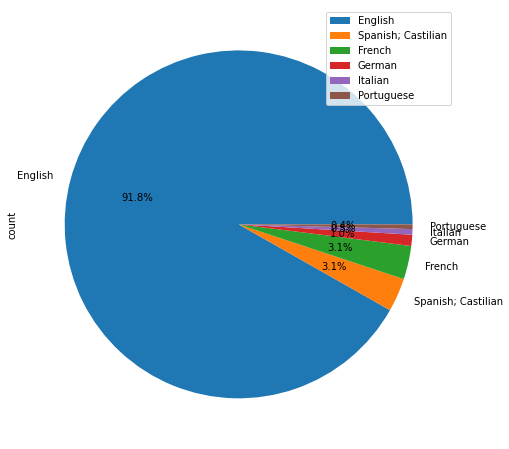

In [27]:
lang_df.head(6).plot.pie(y=0, figsize=(8,8), autopct='%1.1f%%',)#[review_df["language"] == "en"]

In [15]:
review_lang = pd.read_csv("reviews_language.csv")

In [16]:
review_lang["language"].map(language_short_name).value_counts()

English                          1029218
French                             12012
Spanish; Castilian                  8670
German                              6301
Romanian; Moldavian; Moldovan       5045
Korean                              4975
Tagalog                             2015
Afrikaans                           1892
Italian                             1804
Portuguese                          1686
Somali                              1535
Japanese                            1379
Dutch; Flemish                      1120
Catalan; Valencian                  1014
Russian                              954
Czech                                929
Swedish                              672
Norwegian                            626
Polish                               551
Croatian                             515
Danish                               418
Swahili                              393
Hungarian                            347
Welsh                                290
Vietnamese      

In [61]:
comments = review_lang[review_lang["language"].isin(["es","fr","de","it","pt","ro","zh-cn","ko","nl"])]["comments"]

<AxesSubplot:ylabel='count'>

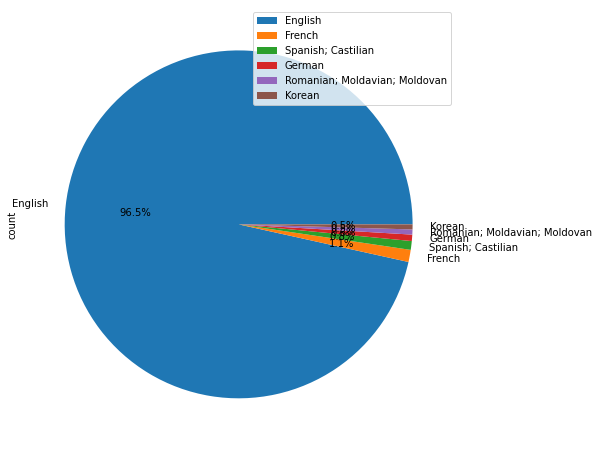

In [19]:
lang_df.head(6).plot.pie(y=0, figsize=(8,8), autopct='%1.1f%%',)#[review_df["language"] == "en"]

In [5]:
from googletrans import Translator
translator = Translator()


def trans(text):
    try:
        translate_text = translator.translate(text).text
    except:
        return text
    return translate_text

In [ ]:
review_lang[review_lang["language"].isin(["es","fr","de","it","pt","ro","zh-cn","ko","nl"])]["comments"].apply(trans)

In [67]:
trans("Notre séjour de trois nuits")

'Our stay of three nights'

In [6]:
review_lang["Translated_Comments"] = review_lang[review_lang["language"].isin(["nl"])]["comments"].apply(trans)

In [9]:
review_lang["Translated_Comments"].isnull().sum()

846655

In [10]:
len(review_lang["Translated_Comments"]) - review_lang["Translated_Comments"].isnull().sum()

2070

In [11]:
review_lang["Translated_Comments"] = review_lang[review_lang["language"].isin(["es","fr","de","it","pt"])]["comments"].apply(trans)

In [12]:
len(review_lang["Translated_Comments"])

848725

In [13]:
review_lang["Translated_Comments"].isnull().sum()

781134

In [14]:
review_lang.to_csv("review_translated.csv")

In [7]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [8]:
vader_polarity_compound = lambda s: (SentimentIntensityAnalyzer().polarity_scores(s))['compound']

In [9]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/manalshah/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [29]:
str(review_lang["Translated_Comments"][1]) == 'nan'

True

In [41]:
review_lang[~review_lang["Translated_Comments"].isna()]

,Unnamed: 0,listing_id,id,date,reviewer_id,reviewer_name,comments,language,Translated_Comments
0,0,2595,17857,2009-11-21,50679,Jean,Notre séjour de trois nuits. . Nous avons appr...,fr,Our stay of three nights..We enjoy the apartme...
21,21,2595,194307810,2017-09-16,81450805,Marina,Tiene una ubicación excelente. Buen equipamien...,es,It has an excellent location.Good equipment of...
33,33,2595,283276097,2018-06-29,51923495,Fabiola,Jennifer es un anfitrión increíble. Siempre es...,es,Jennifer is an incredible host.She was always ...
53,53,3831,25015185,2015-01-05,22720105,Olivier,"Lisa était sympa, toujours prête à aider. L'ét...",fr,"Lisa was nice, always ready to help.The floor ..."
58,58,3831,42307078,2015-08-12,38246619,Alain,"Bien que la chambre soit défraichi, nous avons...",fr,"Although the room is faded, we slept well and ..."
...,...,...,...,...,...,...,...,...,...
848552,848552,51595857,436943735656666610,2021-08-25,278585166,Luis Uriel,"la atención de Jay es increíble, te recibe y t...",es,"Jay's attention is amazing, welcomes you and t..."
848566,848566,51603968,438306430404845516,2021-08-27,115071442,Johana,Súper organizado… limpieza excelente.. ubicaci...,es,Super organized ... Excellent cleaning .. Loca...
848571,848571,51614134,435417639314945525,2021-08-23,370001008,Carlos William,no lo piense en reserva la habitación impecabl...,es,do not think about it in reserve the impeccabl...
848593,848593,51623333,438295711190566493,2021-08-27,30936457,Kyle,Cute new studio in a nice residential area!,it,Cute new studio in a nice residential area!


In [10]:
review_lang['polarity'] = review_lang[~review_lang["Translated_Comments"].isna()]["Translated_Comments"].map(vader_polarity_compound)

In [54]:
review_lang[~review_lang['polarity'].isna()].index

,Unnamed: 0,listing_id,id,date,reviewer_id,reviewer_name,comments,language,Translated_Comments,polarity
0,0,2595,17857,2009-11-21,50679,Jean,Notre séjour de trois nuits. . Nous avons appr...,fr,Our stay of three nights..We enjoy the apartme...,0.8887
21,21,2595,194307810,2017-09-16,81450805,Marina,Tiene una ubicación excelente. Buen equipamien...,es,It has an excellent location.Good equipment of...,0.5719
33,33,2595,283276097,2018-06-29,51923495,Fabiola,Jennifer es un anfitrión increíble. Siempre es...,es,Jennifer is an incredible host.She was always ...,0.9147
53,53,3831,25015185,2015-01-05,22720105,Olivier,"Lisa était sympa, toujours prête à aider. L'ét...",fr,"Lisa was nice, always ready to help.The floor ...",0.8957
58,58,3831,42307078,2015-08-12,38246619,Alain,"Bien que la chambre soit défraichi, nous avons...",fr,"Although the room is faded, we slept well and ...",0.4404
...,...,...,...,...,...,...,...,...,...,...
848552,848552,51595857,436943735656666610,2021-08-25,278585166,Luis Uriel,"la atención de Jay es increíble, te recibe y t...",es,"Jay's attention is amazing, welcomes you and t...",0.9459
848566,848566,51603968,438306430404845516,2021-08-27,115071442,Johana,Súper organizado… limpieza excelente.. ubicaci...,es,Super organized ... Excellent cleaning .. Loca...,0.9623
848571,848571,51614134,435417639314945525,2021-08-23,370001008,Carlos William,no lo piense en reserva la habitación impecabl...,es,do not think about it in reserve the impeccabl...,0.6369
848593,848593,51623333,438295711190566493,2021-08-27,30936457,Kyle,Cute new studio in a nice residential area!,it,Cute new studio in a nice residential area!,0.7263


In [57]:
review_lang[~review_lang['polarity'].isna()].index

Int64Index([     0,     21,     33,     53,     58,     63,     69,     72,
                73,     90,
            ...
            848402, 848412, 848433, 848446, 848485, 848552, 848566, 848571,
            848593, 848684],
           dtype='int64', length=67591)

In [45]:
len(review_lang["polarity"]) - review_lang['polarity'].isna().sum()

67591

In [4]:
review_pol = pd.read_csv("review_polarity.csv")

In [56]:
review_pol[~review_pol['polarity'].isna()].index

Int64Index([     2,      3,      4,      5,      6,      7,      8,      9,
                10,     11,
            ...
            848715, 848716, 848717, 848718, 848719, 848720, 848721, 848722,
            848723, 848724],
           dtype='int64', length=755572)

In [5]:
review_lang = pd.read_csv("review_translated.csv")

In [60]:
len(set(review_lang[~review_lang['polarity'].isna()].index.tolist()) - set(review_pol[~review_pol['polarity'].isna()].index.tolist()))

67591

In [61]:
review_lang["polarity"]

0         0.8887
1            NaN
2            NaN
3            NaN
4            NaN
           ...  
848720       NaN
848721       NaN
848722       NaN
848723       NaN
848724       NaN
Name: polarity, Length: 848725, dtype: float64

In [ ]:
rp = review_pol.merge(review_lang["polarity"].to_frame(), how = "inner", on = "polarity")

In [16]:
rp

,Unnamed: 0,listing_id,id,date,reviewer_id,reviewer_name,comments,language,polarity_x,polarity_y
0,0,2595,17857,2009-11-21,50679,Jean,Notre séjour de trois nuits. . Nous avons appr...,fr,NaN,0.8887
1,1,2595,19176,2009-12-05,53267,Cate,Great experience.,ro,NaN,NaN
2,2,2595,19760,2009-12-10,38960,Anita,I've stayed with my friend at the Midtown Cast...,en,0.9248,NaN
3,3,2595,34320,2010-04-09,71130,Kai-Uwe,"We've been staying here for about 9 nights, en...",en,0.9229,NaN
4,4,2595,46312,2010-05-25,117113,Alicia,We had a wonderful stay at Jennifer's charming...,en,0.9464,NaN
...,...,...,...,...,...,...,...,...,...,...
848720,848720,51909801,439754058671859318,2021-08-29,210113336,Ari,This was one of the Best hotel experiences I h...,en,0.9960,NaN
848721,848721,51910059,439796226033211137,2021-08-29,175633805,Leo,The room was exactly as described and was over...,en,0.6588,NaN
848722,848722,51921047,439769182951927960,2021-08-29,255614539,Niki,Fast response . Easy check in . . Deposit appl...,en,0.7650,NaN
848723,848723,51926089,441249378414275416,2021-08-31,419619884,Ingrid,Amazing location and place! You will love it !,en,0.8619,NaN
